In [1]:
from pynsn import factory, distr

In [2]:
da_specs = factory.DotArraySpecs(
    target_area_radius=200,
    diameter_distribution=distr.Beta(mu=13, sigma=4, min_max=(10,25)),
    minimum_gap=2)

In [3]:
# Generate random dot array with 55 dots
stimulus = factory.random_array(da_specs, 55)

In [4]:
# The dot array is described by a list of positions and diameters 
print(stimulus.xy)
print(stimulus.diameters)

[[-6.94083373e+01  1.49815572e+02]
 [-1.12659703e+01 -1.08042330e+02]
 [ 8.65154730e+01 -1.04352509e+02]
 [-1.28072037e+02 -8.07188100e+01]
 [-5.81505137e+01  1.75078246e+02]
 [ 4.68960780e+01  1.14544484e+02]
 [-7.45289368e+01 -7.67068976e+01]
 [-8.23791395e+01 -1.04918944e+02]
 [-2.10978032e+01  6.24235780e+01]
 [-1.67638290e-01 -6.08393710e+01]
 [-8.79106648e+01 -4.71857605e+01]
 [ 3.90112116e+01 -1.85873848e+02]
 [-1.63686328e+01 -1.90439165e+02]
 [-6.88319879e+01  8.06180324e+01]
 [ 1.33972666e+01 -1.62353067e+02]
 [ 9.81874232e+01  1.36040463e+02]
 [ 1.25532997e+02  1.95916168e+01]
 [ 8.49831466e+01  1.55715166e+02]
 [ 1.45407975e+02 -4.92197829e+00]
 [ 6.86727125e+00  1.38481528e+02]
 [ 1.50936872e+02 -5.34455607e+01]
 [ 1.14746911e+02  1.20453581e+01]
 [-1.62672222e+02  5.12124958e+01]
 [ 8.22343537e+01  6.04286466e-01]
 [-6.23267782e+01 -1.15628133e+02]
 [ 3.70296053e+01  6.69197366e+00]
 [ 1.64091534e+02 -3.43231499e+00]
 [ 5.58158774e+01 -8.45199196e+01]
 [-6.27899076e+01  7

# Make pictures

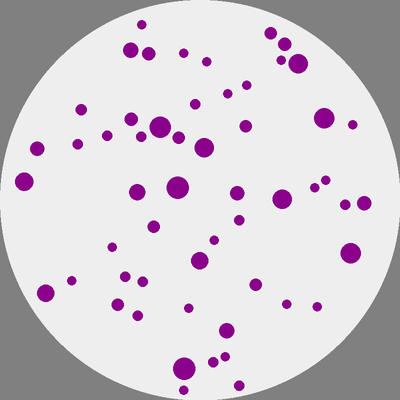

In [5]:
from pynsn import ImageColours
from pynsn.image import svg, pil

# To make picture (pillow), first define some colour features
my_colours = ImageColours(target_area="#EEEEEE", background="gray",
                         item_colour="darkmagenta") # show named colours see Colour.NAMED_COLOURS
pil.create(stimulus, colours=my_colours)

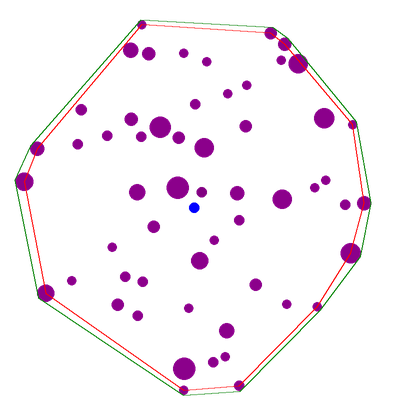

In [6]:
# example: to plot field area and center of mass, just define the repective colours and plot
my_colours2 = ImageColours(target_area=None,
                          field_area="red",
                          field_area_outer="green",
                          center_of_mass="purple",
                          center_of_outer_positions="blue",
                          background=None,
                          item_colour="darkmagenta")
pil.create(stimulus, colours=my_colours2)

In [7]:
# to save the stimulus as vector graphic, generate a SVG stimuli
svg_stimulus = svg.create(stimulus, colours=my_colours, filename="demo.svg")
svg_stimulus.save()

# Visual Features

In [8]:
# show properties for the current stimulus
print(stimulus)

- Hash: fbc949d2572455c8ed7ae31df7aab7f9
  Numerosity..........        55.00
  Total surface area..      7991.43
  Mean item surface area       145.30
  Mean item diameter..        13.00
  Total perimeter.....        40.84
  Mean item perimeter.      2246.24
  Field area..........     90141.25
  Sparsity............      1638.93
  Coverage............         0.09
  Log Size............        20.15
  Log Spacing.........        27.14



In [9]:
from pynsn import match

# change surface array
match.total_surface_area(stimulus, 23000)
print(stimulus)

- Hash: 84a6ebdef2e4b684bca0862d3eb3753f
  Numerosity..........        55.00
  Total surface area..     23000.00
  Mean item surface area       418.18
  Mean item diameter..        22.05
  Total perimeter.....        69.29
  Mean item perimeter.      3810.73
  Field area..........     90141.25
  Sparsity............      1638.93
  Coverage............         0.26
  Log Size............        23.20
  Log Spacing.........        27.14



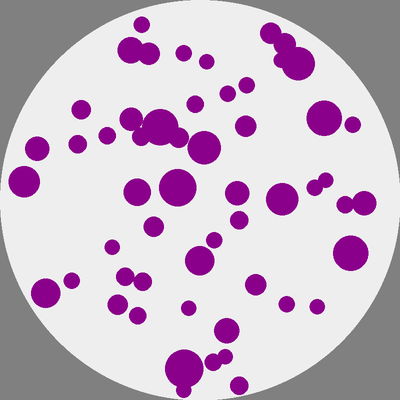

In [10]:
pil.create(stimulus, colours=my_colours)

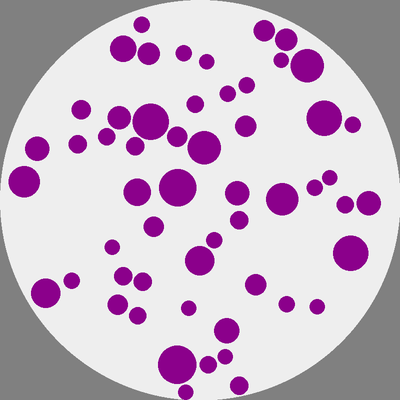

In [11]:
# realign dot arry to avoid overlap
stimulus.realign()
pil.create(stimulus, colours=my_colours)

In [12]:
# change log_size 
match.log_size(stimulus, 18)
print(stimulus)

- Hash: 632d667e894042c3a6afb8d7c9ad90b3
  Numerosity..........        55.00
  Total surface area..      3797.09
  Mean item surface area        69.04
  Mean item diameter..         8.96
  Total perimeter.....        28.15
  Mean item perimeter.      1548.35
  Field area..........     90940.12
  Sparsity............      1653.46
  Coverage............         0.04
  Log Size............        18.00
  Log Spacing.........        27.16



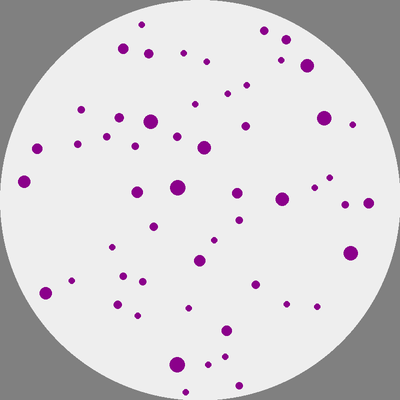

In [13]:
pil.create(stimulus, colours=my_colours)

In [14]:
# change spacing parameter (iterative procedure)
match.log_spacing(stimulus, 24,  precision=0.01)
print(stimulus)

- Hash: e4cb21e9967659bd444d3e73ab668885
  Numerosity..........        55.00
  Total surface area..      3797.09
  Mean item surface area        69.04
  Mean item diameter..         8.96
  Total perimeter.....        28.15
  Mean item perimeter.      1548.35
  Field area..........     30376.76
  Sparsity............       552.30
  Coverage............         0.12
  Log Size............        18.00
  Log Spacing.........        24.00



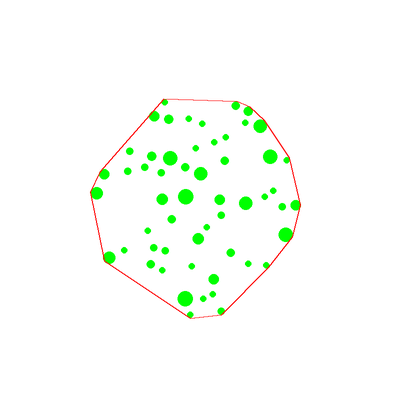

In [15]:
# as you see the surface area and sparsity (1/density) is smaller
pil.create(stimulus, colours=ImageColours(field_area_outer="red"))

# 2 matched stimuli

In [16]:
my_colours = ImageColours(target_area="#EEEEEE", item_colour="lime") 

da_specs2 = factory.DotArraySpecs(
    target_area_radius=200,
    diameter_distribution=factory.distr.Normal(mu=13, sigma=4, min_max=(10,25)),
    minimum_gap=2)

stim1 = factory.random_array(da_specs2, 30)
stim2 = factory.random_array(da_specs2, 30)

In [17]:
ra_specs = factory.RectangleArraySpecs(
    target_area_radius=200,
    diameter_distribution=factory.distr.Normal(mu=13, sigma=4, min_max=(10,25)),
    minimum_gap=2)

TypeError: __init__() got an unexpected keyword argument 'diameter_distribution'

In [24]:
d = distr.Discrete(population=["red", "blue"])

<BarContainer object of 100 artists>

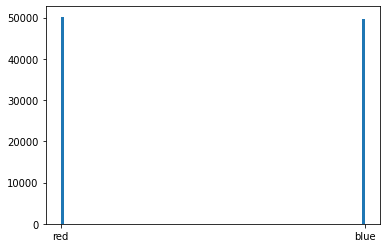

In [25]:
d.pyplot_samples()